## Clusteranalyse

Cluster analyzes (clustering algorithms, occasionally also: agglomeration analysis) are methods for discovering similarity structures in (usually relatively large) databases. The groups of “similar” objects found in this way are referred to as clusters, the group assignment as clustering. The similarity groups can be graph-theoretical, hierarchical, partitioning or optimizing.

An overview of all clustering methods implemented in sklean with the description of the respective parameters and simple application examples can be found here: <a href="https://scikit-learn.org/stable/modules/clustering.html">Click me!</a>


In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools
from itertools import combinations
import warnings
import re                              

from warnings import filterwarnings
filterwarnings('ignore')

# Parameters for Graphics
f_breite = 12
f_höhe = 8

In [4]:
# K-Means
from sklearn.cluster import KMeans

# just to check how k-means works..
from sklearn.metrics import pairwise_distances_argmin   

### Let us imagine that we have information about various sensor data of a machine and would like to know whether there are stable patterns in the measurement data ...

### We create these values with the function "make_blobs". Usually we do not know the data that we want to explain.

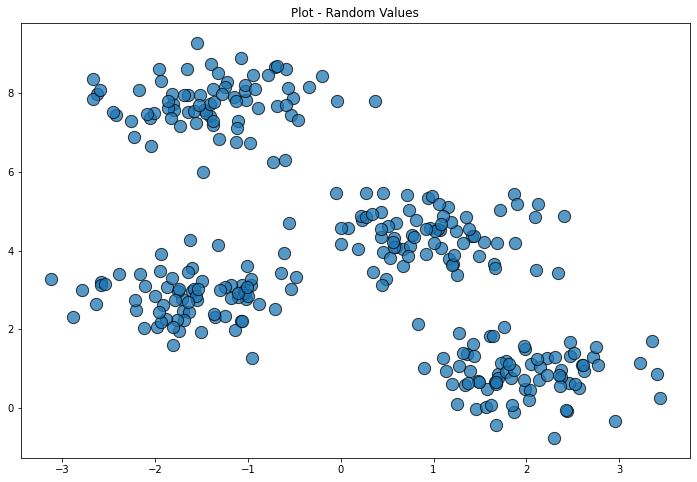

In [5]:
# Creating random data with make_blobs
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)

plt.figure(figsize=(f_breite, f_höhe))
plt.scatter(X[:, 0], X[:, 1], s=150, edgecolors='k',alpha=0.75)
plt.title('Plot - Random Values')
plt.show()

At first glance we can see that we have 4 clusters. So the graphical analysis can sometimes be a good start. Unfortunately, in reality it is rarely that easy ...

### ... then clustering methods can help us to find such patterns in data.

## K-Means

K-Means is one of many clustering processes. It is probably the best known and the method that is used most frequently in practice.

In [6]:
# k-means requires the parameter n_cluster. We don't usually know this value.

kmeans = KMeans(n_clusters=4) # For clustering to work, we have to say how many clusters we want to find.
kmeans.fit(X) # We only need the explanatory data to "fit"
y_kmeans = kmeans.predict(X)

In [7]:
y_kmeans # we want to find 4 clusters. -> Labels 0-3 are assigned.

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

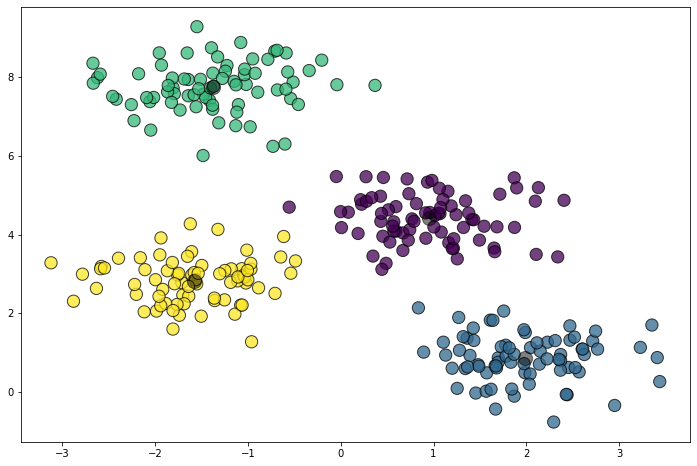

In [8]:
plt.figure(figsize=(f_breite, f_höhe)) # parameters for the graph
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=150, cmap='viridis', edgecolors='k',alpha=0.75)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### How does k-means work?

<img src='data/em2.png'>

### Determination of the cluster assignment

Initialization: Choose k random means from the data set. <br>

After that, the cluster centers are shifted, until a further shift does not improve the sum of all distances of all observations from their cluster centers. It is called "Expectation-Maximation" method or <a href="https://de.wikipedia.org/wiki/K-Means-Algorithmus">Lloyd-Algorithmus</a>. <br>

Expectation: Each data object is assigned to the cluster in which the cluster variance is least increased. (So the one closest to it.)
Maximization (update): The averages are recalculated.

### We could even write k-means in a few lines of code ourselves. (We don't have to, but we can.)

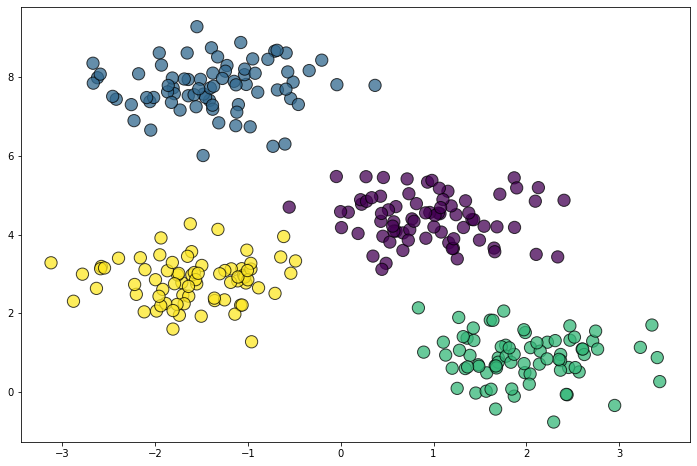

In [9]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)

plt.figure(figsize=(f_breite, f_höhe))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=150, cmap='viridis', edgecolors='k',alpha=0.75)   # "labels" comes from our code
plt.show()

### How can we read out the optimized cluster centers?

In [10]:
kmeans.cluster_centers_ 
# With our randomly generated data, these would be the cluster centers that we would find.

array([[ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

### How do we find out what has been assigned to which cluster?

In [11]:
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

### ... and how do we get... ?

In [12]:
# take a look at "dir"
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

### How do we find out how many clusters there are and what is the right value for k if it is not that obvious?

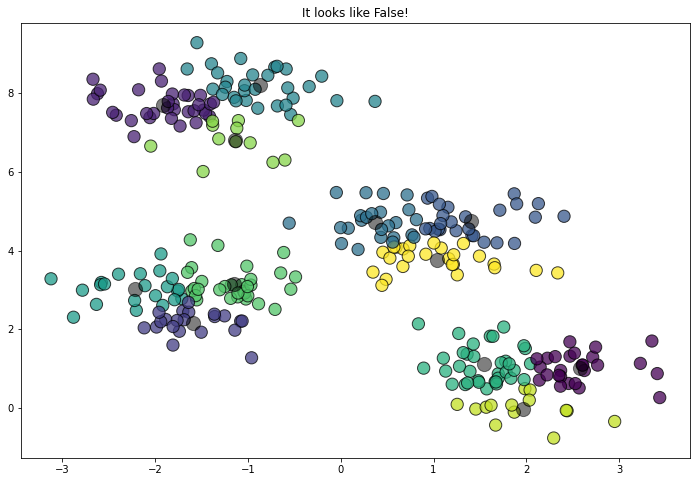

In [13]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(f_breite, f_höhe))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=150, cmap='viridis', edgecolors='k',alpha=0.75)
centers = kmeans.cluster_centers_
plt.title('It looks like False!')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### the Calinski or Elbow Method can help us

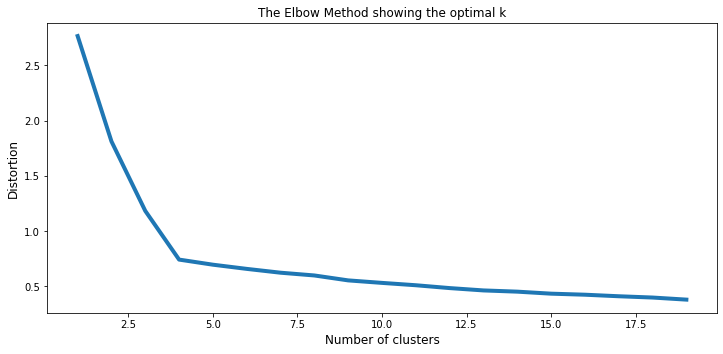

In [14]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.figure(figsize=(f_breite, f_höhe*(2/3)))
plt.plot(K, distortions, linewidth = 4)
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Distortion', fontsize = 12)
plt.title('The Elbow Method showing the optimal k', fontsize = 12)
plt.show()

### ... the first break point marks the point

In [15]:
import numpy as np
from scipy.signal import argrelextrema

df_dist = pd.DataFrame(distortions, columns=['Distortion'])
idx_of_loc_min = argrelextrema(df_dist.diff().fillna(0).values, np.less)[0][0]
print('The first local minimum is reached in {} clusters.'.format(idx_of_loc_min+1))

The first local minimum is reached in 2 clusters.


#### Attention: If you do not use the "graphical analysis", use the approach above to determine the first "real" break point (extreme point). This is not necessarily the best way. The Calinski process works much better.

### K-Means is super simple and apparently quite powerful. but what'd be wrong with that?

### Criticals, K-Means:
- The starting points are random. If you are "unlucky", you will not find the right cluster centers.
- K-Means only searches (initially) for clusters in a certain form (only considers the distance to the center.)
- The centers that are found need not be "real" data points.
- K-Means needs cardinally scaled data. -> Wikipedia: https://en.wikipedia.org/wiki/Level_of_measurement
- Noise is not taken into account. I.e. Measurement errors or "random deviations from typical behavior" can distort clustering.

### What can we do if we are not looking for "simple" cluster forms?

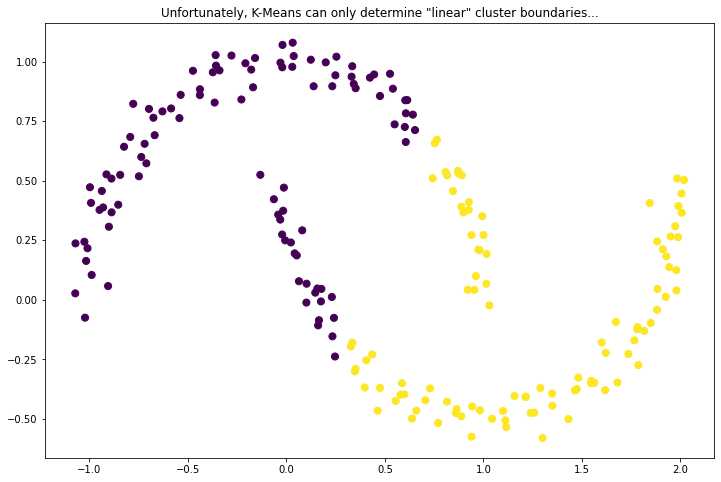

In [16]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(f_breite, f_höhe))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.title('Unfortunately, K-Means can only determine "linear" cluster boundaries...')
plt.show()

### we can still do sth..

### For example, Spectral Clustering is looking for other forms.

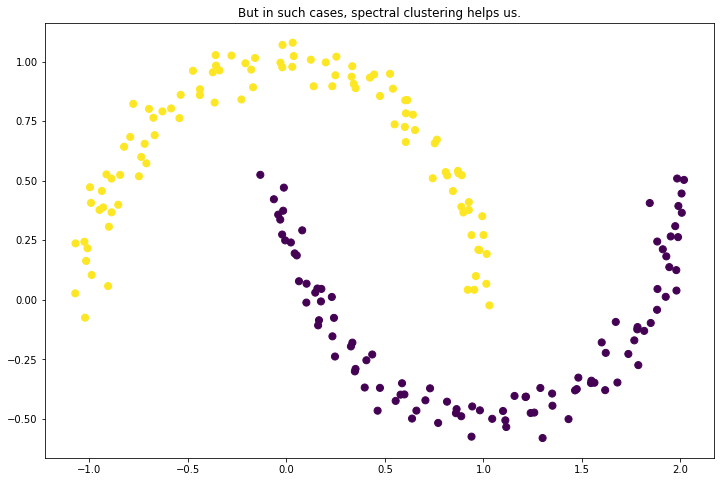

In [17]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.figure(figsize=(f_breite, f_höhe))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.title('But in such cases, spectral clustering helps us.')
plt.show()

### What if we have "noisy" data?

### It would be useful for example: DBSCAN